In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [32]:
# for each migration rate lesxt calculate the probability that deme 2 is seeded by migration and the average time difference between the peaks
p_spread = []
delta_T = []
for migration_rate_idx in range(2,14):
    ds = pd.read_csv(f"../antigenic_variance_deme2_migration_rate_idx_{migration_rate_idx}.csv")
    p_spread.append(ds.shape[0]/10001)

    ds_2 = pd.read_csv(f"../peak_time_difference_migration_rate_idx_{migration_rate_idx}.csv")
    delta_T.append(ds_2.PeakTimeDifference.mean())

p_spread = np.array(p_spread)
delta_T = np.array(delta_T)
migration_rates = 10**(np.linspace(-10, 1.0, 12))

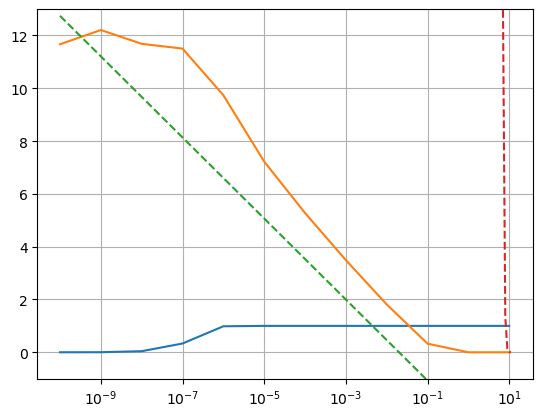

In [79]:
plt.plot(migration_rates, p_spread)
plt.plot(migration_rates, delta_T)
plt.plot(migration_rates, 1/1.5 * np.log(4/(2 * 100 * migration_rates)),'--')
plt.plot(4 / (2 * 1.5 * 100 * migration_rates), "--")
plt.ylim(-1,13)
plt.xscale("log")
plt.grid()

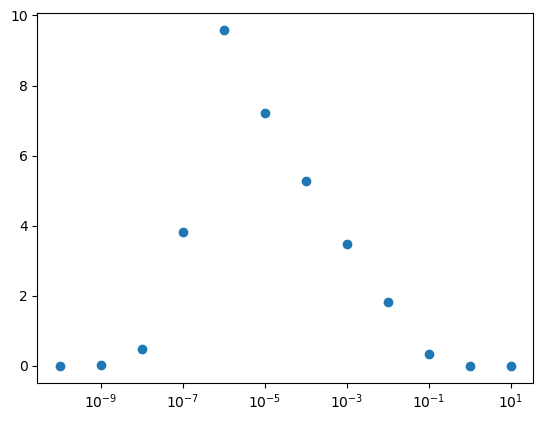

In [36]:
plt.scatter(migration_rates, np.array(p_spread) * np.array(delta_T))
plt.xscale("log")


Lets look at how p_spread approaches 1

In [65]:
# lets get an estimate for the maximal number of infected hosts in deme 1 during an outbreak 
import ast
trajectories_df = pd.read_csv("../trajectories_migration_rate_idx_1.csv")
# Initialize variables to store the maximum infected number and the corresponding time for the final trajectory
max_infected_numbers = []

# Plot all trajectories
for index, row in trajectories_df.iterrows():
    trajectory = ast.literal_eval(row['parent'])  # Convert string representation of list to actual list
    
    max_infected_numbers.append(max(trajectory))

Nmax = np.mean(max_infected_numbers)

In [67]:
np.std(max_infected_numbers)

9647.067476532724

Text(0, 0.5, 'spread probability')

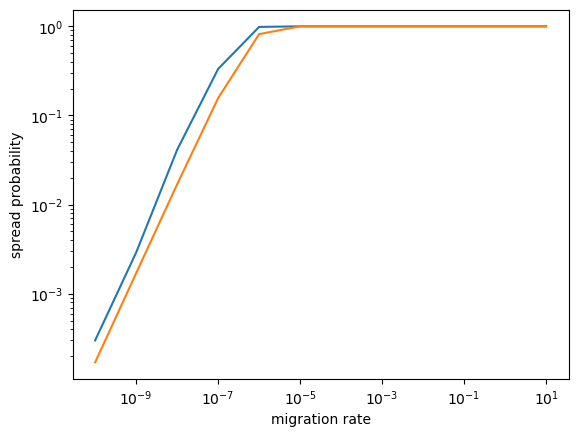

In [66]:
plt.plot(migration_rates, p_spread)
plt.plot(migration_rates, 1 - np.exp(-migration_rates * (2 * 2.5 * Nmax)/4))
plt.yscale("log")
plt.xscale("log")
plt.xlabel("migration rate")
plt.ylabel("spread probability")

In [86]:
from scipy.special import lambertw

lambertw(100/(Nmax * 2.5))

(2.9388741866827796e-05+0j)

In [87]:
4 / (2 * Nmax)

1.4694802788833968e-06

In [88]:
migration_rates

array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01])